In [1]:
#initialization
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
%config InlineBackend.figure_format = 'svg' # Makes the images look nice

# importing Qiskit
from qiskit import *

# import basic plot tools
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt

In [2]:
#build grover's circuit for 2 qubits
n = 2

q = QuantumRegister(n)
grover_circuit = QuantumCircuit(q)

for qubit in range(n):
    grover_circuit.h(q[qubit])

for qubit in range(n):
    grover_circuit.x(q[qubit])

grover_circuit.cz(q[0], q[1])

for qubit in range(n):
    grover_circuit.x(q[qubit])

for qubit in range(n):
    grover_circuit.h(q[qubit])

for qubit in range(n):
    grover_circuit.z(q[qubit])
grover_circuit.cz(q[0], q[1])

for qubit in range(n):
    grover_circuit.h(qubit)
        
grover_circuit.draw()

In [3]:
c = ClassicalRegister(n)
grover_circuit += QuantumCircuit(c)
grover_circuit.measure(q,c,basis='Ensemble',add_param='Z')

backend1 = BasicAer.get_backend('qasm_simulator')
shots = 1024
results = execute(grover_circuit, backend=backend1, shots=shots).result()
answer = results.get_counts()
plot_histogram(answer)

In [4]:
backend2 = BasicAer.get_backend('dm_simulator')
# Noise parameters
options = {}
options1 = {
    "thermal_factor": 0.,
    "decoherence_factor": .9,
    "depolarization_factor": 0.99,
    "bell_depolarization_factor": 0.99,
    "decay_factor": 0.99,
    "rotation_error": {'rx':[1., 0.], 'ry':[1., 0.], 'rz': [1., 0.]},
    "tsp_model_error": [1., 0.],
    "plot": False
}
# Execution with and without noise
run = execute(grover_circuit,backend2,**options)
result = run.result()
run_error = execute(grover_circuit,backend2,**options1)
result_error = run_error.result()

# Final state (probabilities)
prob = result['results'][0]['data']['ensemble_probability']
prob1 = result_error['results'][0]['data']['ensemble_probability']

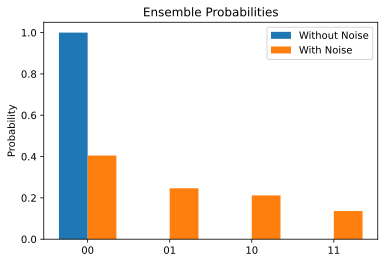

In [5]:
labels = prob1.keys()
without_noise = prob.values()
with_noise = prob1.values()

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, without_noise, width, label='Without Noise')
rects2 = ax.bar(x + width/2, with_noise, width, label='With Noise')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Probability')
ax.set_title('Ensemble Probabilities')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
plt.show()